# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [ ]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values # to get the open prices only 

In [ ]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

### Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [ ]:
X_train = []
y_train = []
for i in range(60, len(training_set)):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train),np.array(y_train)

### Reshaping

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) # here we reshaping the training set 
#so it can fit what the RNN is expecting the first element in the tuple is the number of datapoints that we have which is the number of columns
# and the second element is the number of columns or the numner of time steps which is 60 in this case
# and the last element which is the number of indicators that we have and each indicator has its own clumns and rows

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


### Initialising the RNN

In [ ]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 128, return_sequences = True, input_shape = (X_train.shape[1],1))) # The return_squences is the bool statement that state is there is going to be a next layer after the added one
# the input shape here is for how the RNN is going to revieve the input which is in the form of indicators and each indecator has a 60 timestep
regressor.add(Dropout(rate = 0.2)) # here we adding a dropout to avoid overfitting by dropping 20% of the nuerons dropping 10 out of 50

### Adding a second LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 128, return_sequences = True)) # here we do not have to express the input shape becuase it is already know for the 
#RNN because of the previous units or nuerons from the previous layer
regressor.add(Dropout(rate = 0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 128, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 128))  # here we put the last layer so there is no return_sequences
regressor.add(Dropout(rate = 0.2))

### Adding the output layer

In [ ]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [ ]:
regressor.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0296
Epoch 2/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0037
Epoch 3/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0035
Epoch 4/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0040
Epoch 5/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0033
Epoch 6/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0033
Epoch 7/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0035
Epoch 8/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0029
Epoch 9/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0030
Epoch 10/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0027
Epoch 11/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0028
Epoch 12/100
1198/1198 [============================

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [ ]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values # to get the open prices only 

### Getting the predicted stock price of 2017

In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1)) # here we reshaping the training set 
#so it can fit what the RNN is expecting the first element in the tuple is the number of datapoints that we have which is the number of columns
# and the second element is the number of columns or the numner of time steps which is 60 in this case
# and the last element which is the number of indicators that we have and each indicator has its own clumns and rows
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualising the results

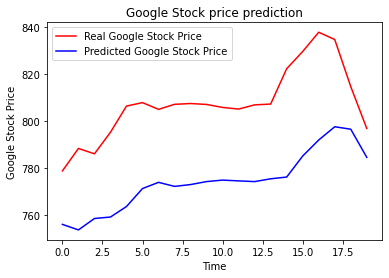

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title("Google Stock price prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()